# Homework 5

### Name : Tanubrata Dey (td2201)

Q1. (50pts)


1.   Use Lasso regularization to fit a model to predict body_mass_g from flipper_length and bill_depth_mm using a 10th degree polynomial. If you are using R, use the funtion `poly`.
2.   Fit a linear model to predict body_mass_g from flipper_length and bill_depth_mm using a 10th degree polynomial (no regularization)
3. Create a fake test dataset for flipper_length and bill_depth_mm where each vector ranges from -50 to 50 (example below). Predict body_mass_g using the linear model with no regularization, and then using lasso. Plot the density of the predictions for each (example below). 
4. Explain what you see when you use your fake dataset for lasso and linear regression with no regularization. Is this expected?






In [1]:
%%capture
# activate R magic to use R in this notebook
# https://ipython.org/ipython-doc/2/config/extensions/rmagic.html
%load_ext rpy2.ipython

In [ ]:
%%R 
install.packages("palmerpenguins")
library(palmerpenguins)
data(package = 'palmerpenguins')
head(penguins)

In [ ]:
fake_test <- data.frame(flipper_length_mm = seq(-50, 50, 1),
                        bill_depth_mm = seq(-50, 50, 1))

In [ ]:
# data is a data frame with a column named preditions_lasso that contains the predictions using the fake test set using lasso regression.
ggplot(data, aes(preditions_lasso)) +
geom_density()

***
**1.1) Use Lasso regularization to fit a model to predict body_mass_g from flipper_length and bill_depth_mm using a 10th degree polynomial. If you are using R, use the funtion poly.**

In [2]:
%%capture
%%R 
install.packages("palmerpenguins")
library(palmerpenguins)
data(package = 'palmerpenguins')
head(penguins)

In [3]:
%%R
head(penguins)

# A tibble: 6 × 8
  species island bill_length_mm bill_depth_mm flipper_length_… body_mass_g sex  
  <fct>   <fct>           <dbl>         <dbl>            <int>       <int> <fct>
1 Adelie  Torge…           39.1          18.7              181        3750 male 
2 Adelie  Torge…           39.5          17.4              186        3800 fema…
3 Adelie  Torge…           40.3          18                195        3250 fema…
4 Adelie  Torge…           NA            NA                 NA          NA <NA> 
5 Adelie  Torge…           36.7          19.3              193        3450 fema…
6 Adelie  Torge…           39.3          20.6              190        3650 male 
# … with 1 more variable: year <int>


In [10]:
%%capture
%%R
install.packages("caret")
library(ggplot2)
library(caret)


In [4]:
%%R

penguins_subs = penguins[ , c("bill_depth_mm", "flipper_length_mm", "body_mass_g")]


In [5]:
%%R
dim(penguins_subs)

[1] 344   3


In [6]:
%%R
#dropping the NA values in the data
penguin_filter = na.omit(penguins_subs)
dim(penguin_filter)

[1] 342   3


In [7]:
%%R
#creating the train and test data
train_size <- floor(0.75 * nrow(penguin_filter))
set.seed(543)
train_pos <- sample(seq_len(nrow(penguin_filter)), size = train_size)

train_regression <- data.frame(penguin_filter[train_pos,]) 
test_regression <- data.frame(penguin_filter[-train_pos,])

In [8]:
%%R
print(dim(train_regression)) #dim of train data
print(dim(test_regression)) #dim of test data

[1] 256   3
[1] 86  3


In [53]:
%%R
#train_regression_scaled = data.frame(scale(train_regression))
#test_regression_scaled = data.frame(scale(test_regression))

In [12]:
%%R
#install.packages("stats")
library(stats)

ctrl =  trainControl(method = "cv", 15) 

Lasso_regression <- train(body_mass_g ~ poly(flipper_length_mm + bill_depth_mm, 10), data = train_regression,
                          method = "lasso", trControl= ctrl, na.action=na.exclude) #fitting the lasso model
Lasso_regression

The lasso 

256 samples
  2 predictor

No pre-processing
Resampling: Cross-Validated (15 fold) 
Summary of sample sizes: 238, 239, 238, 236, 238, 239, ... 
Resampling results across tuning parameters:

  fraction  RMSE      Rsquared   MAE     
  0.1       714.4024  0.7726384  604.7603
  0.5       452.2081  0.7726384  369.1150
  0.9       381.0900  0.7844169  301.9747

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was fraction = 0.9.


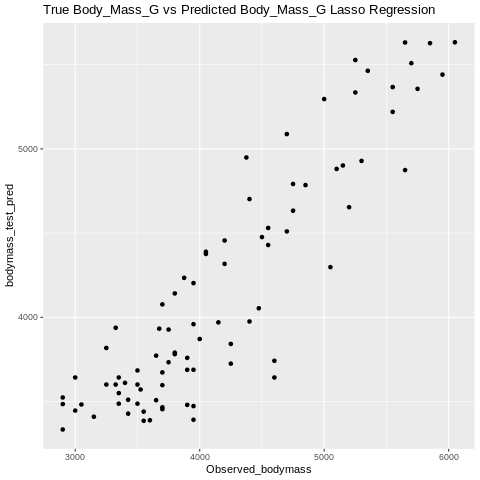

In [14]:
%%R
lasso_test_pred <- predict(Lasso_regression, newdata = test_regression)

#plot the predicted values vs the observed values
plot_lasso_test_pred <- data.frame(bodymass_test_pred = lasso_test_pred, 
                                   Observed_bodymass = test_regression$body_mass_g)
ggplot(data = plot_lasso_test_pred) +
  geom_point(aes(x=Observed_bodymass, y = bodymass_test_pred)) + 
  ggtitle("True Body_Mass_G vs Predicted Body_Mass_G Lasso Regression")



In [15]:
%%R
lasso_test_pred #lasso prediction

       1        2        3        4        5        6        7        8 
3818.373 3781.586 3466.212 3389.002 3473.157 3440.272 3392.052 3386.020 
       9       10       11       12       13       14       15       16 
3410.074 3446.485 3643.066 3428.375 3487.612 3524.358 3673.067 3975.564 
      17       18       19       20       21       22       23       24 
3688.662 3597.659 3842.168 3480.290 3871.527 3643.066 3601.006 3334.296 
      25       26       27       28       29       30       31       32 
3688.662 3742.108 3759.404 3550.284 3601.006 4234.433 4053.756 3510.741 
      33       34       35       36       37       38       39       40 
3725.213 3482.709 3643.066 3733.610 4476.352 4429.368 4901.411 4702.145 
      41       42       43       44       45       46       47       48 
4880.962 4874.133 5219.668 5334.852 4298.072 5632.553 5508.794 5366.906 
      49       50       51       52       53       54       55       56 
4456.161 4928.572 4317.446 5631.631 5087.954 5295.9

**2. Fit a linear model to predict body_mass_g from flipper_length and bill_depth_mm using a 10th degree polynomial (no regularization)**

In [16]:
%%R

lm_fit = train(body_mass_g ~ poly(flipper_length_mm + bill_depth_mm, 10), data = train_regression,
                          method = 'lm', trControl= ctrl, na.action=na.exclude) #fitting linear model
lm_fit

Linear Regression 

256 samples
  2 predictor

No pre-processing
Resampling: Cross-Validated (15 fold) 
Summary of sample sizes: 239, 237, 239, 238, 239, 240, ... 
Resampling results:

  RMSE     Rsquared   MAE     
  381.278  0.7805404  304.8264

Tuning parameter 'intercept' was held constant at a value of TRUE


In [17]:
%%R
lm_test_pred = predict(lm_fit, test_regression) #lm prediction
lm_test_pred

       1        2        3        4        5        6        7        8 
3780.717 3745.703 3464.605 3385.597 3472.573 3433.865 3386.831 3384.782 
       9       10       11       12       13       14       15       16 
3400.218 3441.293 3625.944 3419.851 3488.605 3525.812 3650.465 3942.047 
      17       18       19       20       21       22       23       24 
3663.452 3589.242 3804.042 3480.581 3833.472 3625.944 3591.964 3463.963 
      25       26       27       28       29       30       31       32 
3663.452 3709.667 3725.253 3549.440 3591.964 4219.864 4026.047 3512.595 
      33       34       35       36       37       38       39       40 
3694.747 3483.255 3625.944 3702.126 4471.196 4422.913 4924.590 4705.892 
      41       42       43       44       45       46       47       48 
4901.508 4893.830 5288.537 5406.574 4286.856 5685.369 5535.185 5435.697 
      49       50       51       52       53       54       55       56 
4450.455 4955.452 4307.098 5669.355 5139.392 5368.7

**3) Create a fake test dataset for flipper_length and bill_depth_mm where each vector ranges from -50 to 50 (example below). Predict body_mass_g using the linear model with no regularization, and then using lasso. Plot the density of the predictions for each (example below).**

In [18]:
%%R
fake_test <- data.frame(flipper_length_mm = seq(-50, 50, 1),
                        bill_depth_mm = seq(-50, 50, 1))

head(fake_test)

  flipper_length_mm bill_depth_mm
1               -50           -50
2               -49           -49
3               -48           -48
4               -47           -47
5               -46           -46
6               -45           -45


In [19]:
%%R
lm_model_pred = predict(lm_fit, fake_test)
#lm_model_pred

predicted_lm_df = data.frame(lm_model_pred) #lm prediction df with fake dataset
head(predicted_lm_df,4) 

  lm_model_pred
1 -2.705718e+14
2 -2.541386e+14
3 -2.386087e+14
4 -2.239379e+14


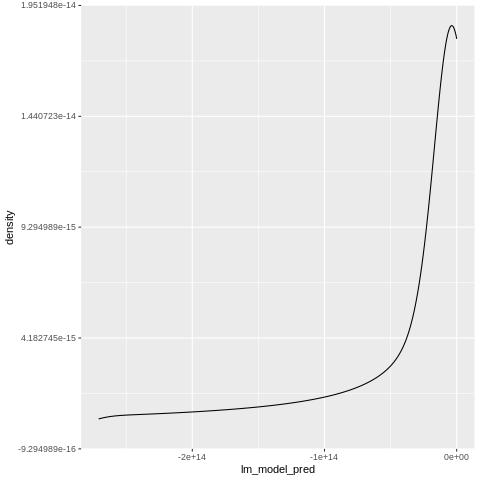

In [20]:
%%R
ggplot(predicted_lm_df, aes(lm_model_pred)) + geom_density() #density plot for fake data in linear model in ggplot

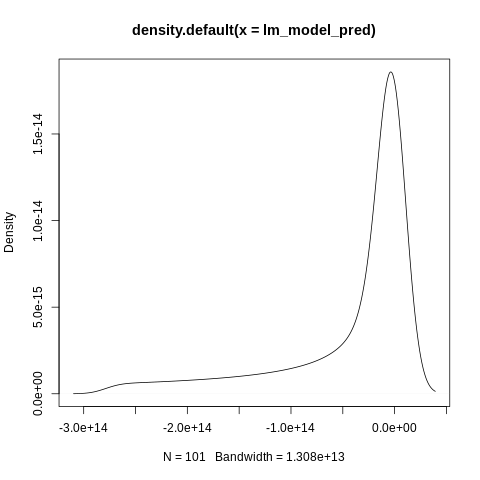

In [23]:
%%R
lm_model_pred = predict(lm_fit, fake_test)#density plot for fake data in linear model
plot(density(lm_model_pred))


In [21]:
%%R
lasso_model_pred = predict(Lasso_regression, fake_test)
#lasso_model_pred

predicted_lasso_df = data.frame(lasso_model_pred)
head(predicted_lasso_df,4)

  lasso_model_pred
1    -603277865231
2    -569963261229
3    -538293409854
4    -508196846873


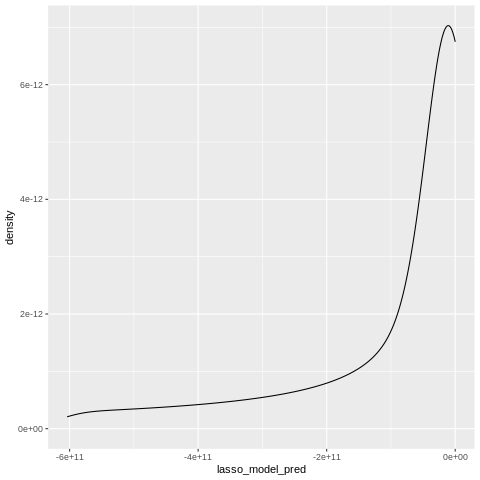

In [22]:
%%R
ggplot(predicted_lasso_df, aes(lasso_model_pred)) + geom_density() #density plot for fake data in lasso model using ggplot

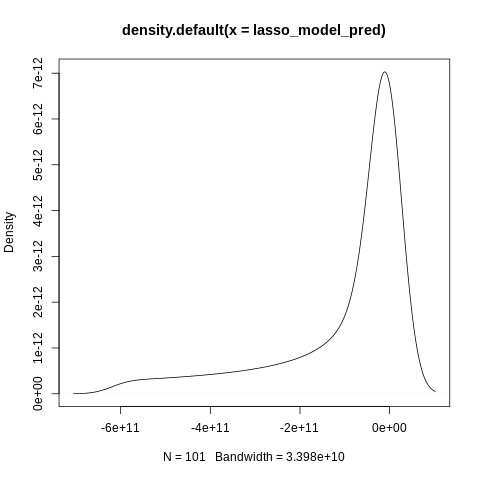

In [24]:
%%R
lasso_model_pred = predict(Lasso_regression, fake_test)
plot(density(lasso_model_pred))
#density plot for fake data in lasso model

**1.4) Explain what you see when you use your fake dataset for lasso and linear regression with no regularization. Is this expected?**

Creating the density plot, in case of lasso regularization model we saw like the curve expanding to is pretty low from -6e+11 to a bit more than 0 and the curve is kind of skewed to the right. In case of linear model density plot I see the curve expanding to is a bit high which is from -3e+14 to more than a bit 0 and it also has a curve that is skewed towards right. Now comparing both of them you can see that the values where the curve start from is very low compared to the linear model, this could be because of the lasso model which regularizes by shrinking the data leading to less variance whereas linear model does not do that. So I guess lasso is better in regularizing data compared to linear model which I guess was expected.

Q2. (50 pts)

1.   Download the MNIST data again. Create two datasets, one containing ones and zeros, another containing ones and sevens. 
2.   Use logistic regression to predict the classes from the two datasets. Plot ROC curves for both.
3. For both datasets, subset the features from 784 to 300 (take the first 300 values) and repeat Q3.2. 
4. Explain any differences in performance between the four datasets (zero and one, one and seven, zero and one subset, one and seven subset)




In [1]:
from tensorflow.keras.datasets import mnist
_ , (dat, lab) = mnist.load_data()

In [2]:
dat = dat[0:1000,:,:].reshape((1000, 28*28))  # flatten the image for the convenient of downstream analysis
lab = lab[0:1000]

In [3]:
dat.shape

(1000, 784)

**2.1) Download the MNIST data again. Create two datasets, one containing ones and zeros, another containing ones and sevens.**

In [4]:
import pandas as pd
import numpy as np

In [8]:
df_data = pd.DataFrame(dat) #creating a df of dat array
df_data.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
df_label = pd.DataFrame(lab)
df_label.columns = ["labels"] #creating a df of labels
df_label.head(2)

,labels
0,7
1,2


In [10]:
result_data_df = pd.concat([df_label, df_data], axis=1, join='inner')
result_data_df.head(2) #merging the data table and labels table into one

,labels,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [11]:
data_0_1_df = result_data_df.loc[(result_data_df['labels'] == 0) | (result_data_df['labels'] == 1)] #filtering out rows that have only 0 & 1 as labels
data_0_1_df.shape

(211, 785)

In [12]:
data_0_1_labels = pd.DataFrame(data_0_1_df["labels"].copy())
data_0_1_labels.shape #keeping a copy of the label column for 0 and 1

(211, 1)

In [13]:
data_0_1_filter = data_0_1_df.drop(["labels"], axis=1) #dropping the label column
data_0_1_filter.shape #dat data for 0 & 1

(211, 784)

In [14]:
data_1_7_df = result_data_df.loc[(result_data_df['labels'] == 1) | (result_data_df['labels'] == 7)] #filtering out rows that have only 1 & 7 as labels
data_1_7_df.shape

(225, 785)

In [15]:
data_1_7_labels = pd.DataFrame(data_1_7_df["labels"].copy())
data_1_7_labels.shape #keeping a copy of the label column for 1 and 7

(225, 1)

In [16]:
data_1_7_filter = data_1_7_df.drop(["labels"], axis=1) #dropping the label column
data_1_7_filter.shape #dat data for 1 & 7

(225, 784)

**2.2) Use logistic regression to predict the classes from the two datasets. Plot ROC curves for both.**

In [17]:
from sklearn.linear_model import LogisticRegressionCV
import pandas as pd
from sklearn.model_selection import train_test_split

**For 0 & 1:**

In [18]:
#Train-test split for 0 & 1
x_train_0_1, x_test_0_1, y_train_0_1, y_test_0_1 = train_test_split(data_0_1_filter, data_0_1_labels, test_size=0.25, random_state=40)

In [19]:
#converting to numpy array
x_train_0_1 = np.array(x_train_0_1)
x_test_0_1 = np.array(x_test_0_1)
y_train_0_1 = np.array(y_train_0_1)
y_test_0_1 = np.array(y_test_0_1)

In [20]:
logistic_regression = LogisticRegressionCV(cv=5, random_state=20) #fitting logistic regression for 0 and 1
lr_fit_0_1 = logistic_regression.fit(x_train_0_1, y_train_0_1)
predict_0_1 = lr_fit_0_1.predict(x_test_0_1) #predicting the model
predict_0_1 #predicted value

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [21]:
y_test_0_1 #true value

array([[0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]], dtype=uint8)

In [22]:
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score

print("accuracy for 0 & 1:",accuracy_score(y_test_0_1, predict_0_1)) #accuracy score
print("recall for 0 & 1:", recall_score(y_test_0_1, predict_0_1)) #precision score
print("precision for 0 & 1:",precision_score(y_test_0_1, predict_0_1)) #recall score

accuracy for 0 & 1: 1.0
recall for 0 & 1: 1.0
precision for 0 & 1: 1.0


In [23]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

test = y_test_0_1
pred = logistic_regression.predict_proba(x_test_0_1)[:, 1] #defining for AUC plot and score
print('roc_auc_score for Logistic regression: ', roc_auc_score(test, pred))

# assign fpr, tpr
fpr, tpr, threshold = roc_curve(test, pred)

auc_df = pd.DataFrame([fpr,tpr]).T
auc_df.columns = ["fpr", "tpr"]

roc_auc_score for Logistic regression:  1.0


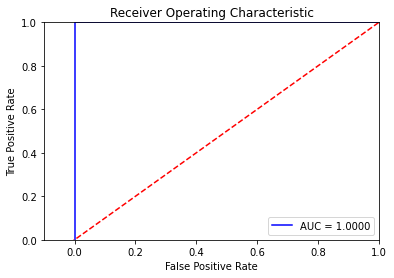

In [24]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % roc_auc_score(test, pred)) #plotting AUC
plt.legend(loc = 'lower right')
plt.plot([-0.1, 1], [-0.1, 1],'r--')
plt.xlim([-0.1, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**For 1 & 7:**

In [25]:
#Train-test split for 1 & 7
x_train_1_7, x_test_1_7, y_train_1_7, y_test_1_7 = train_test_split(data_1_7_filter, data_1_7_labels, test_size=0.25, random_state=40)

In [26]:
x_train_1_7 = np.array(x_train_1_7)
x_test_1_7 = np.array(x_test_1_7)
y_train_1_7 = np.array(y_train_1_7)
y_test_1_7 = np.array(y_test_1_7)

In [27]:
logistic_regression = LogisticRegressionCV(cv=5, random_state=20)
lr_fit_1_7 = logistic_regression.fit(x_train_1_7, y_train_1_7) #fitting logistic regression for 1 & 7
predict_1_7 = lr_fit_1_7.predict(x_test_1_7) #predicting the model
predict_1_7 #predicted data

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([7, 1, 1, 1, 7, 1, 7, 1, 7, 1, 1, 1, 1, 1, 7, 1, 7, 1, 7, 1, 7, 7,
       1, 1, 1, 1, 1, 1, 1, 1, 7, 7, 7, 1, 1, 1, 7, 1, 1, 7, 7, 7, 7, 7,
       1, 1, 7, 7, 1, 7, 7, 1, 1, 1, 7, 1, 7], dtype=uint8)

In [28]:
y_test_1_7 #true values

array([[7],
       [1],
       [1],
       [1],
       [7],
       [1],
       [7],
       [1],
       [7],
       [1],
       [1],
       [1],
       [1],
       [1],
       [7],
       [1],
       [7],
       [1],
       [7],
       [1],
       [7],
       [7],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [7],
       [7],
       [7],
       [1],
       [1],
       [1],
       [7],
       [1],
       [1],
       [7],
       [7],
       [7],
       [7],
       [7],
       [1],
       [1],
       [7],
       [7],
       [7],
       [7],
       [7],
       [1],
       [1],
       [1],
       [7],
       [1],
       [7]], dtype=uint8)

In [29]:
print("accuracy for 1 & 7:",accuracy_score(y_test_1_7, predict_1_7)) #accuracy score
print("recall for 1 & 7:", recall_score(y_test_1_7, predict_1_7)) #recall score
print("precision for 1 & 7:",precision_score(y_test_1_7, predict_1_7)) #precision score

accuracy for 1 & 7: 0.9824561403508771
recall for 1 & 7: 1.0
precision for 1 & 7: 0.9696969696969697


In [30]:
test_1_7 = y_test_1_7
pred_1_7 = logistic_regression.predict_proba(x_test_1_7)[:, 1] #defining for use in AUC plot and score
print('roc_auc_score for Logistic regression of 1 & 7 is : ', roc_auc_score(y_test_1_7, pred_1_7)) #auc score

# assign fpr, tpr
fpr_1_7, tpr_1_7, threshold_1_7 = roc_curve(test_1_7, pred_1_7, pos_label=7)

auc_df1 = pd.DataFrame([fpr_1_7,tpr_1_7]).T
auc_df1.columns = ["fpr", "tpr"]

roc_auc_score for Logistic regression of 1 & 7 is :  0.99875


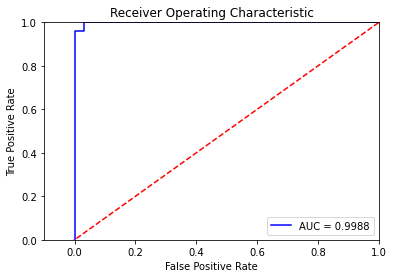

In [31]:
#ROC plot
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_1_7, tpr_1_7, 'b', label = 'AUC = %0.4f' % roc_auc_score(y_test_1_7, pred_1_7)) #plotting the auc
plt.legend(loc = 'lower right')
plt.plot([-0.1, 1], [-0.1, 1],'r--')
plt.xlim([-0.1, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



**2.3) For both datasets, subset the features from 784 to 300 (take the first 300 values) and repeat Q3.2.** 

In [5]:
dat = dat[:, 0:300] # subsetting for Q3.3
dat.shape

(1000, 300)

In [6]:
#import all the datasets
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegressionCV
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [7]:
df_data = pd.DataFrame(dat) #creating a df of dat array
df_data.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,72,114,163,227,254,225,254,254,254,250,229,254,254,140,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17,66,14,67,67,67,59,21,236
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,117,247,253,198,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,76,247,253,231,63,0,0,0


In [8]:
df_label = pd.DataFrame(lab)
df_label.columns = ["labels"] #creating a df of labels
df_label.shape

(1000, 1)

In [9]:
result_data_df = pd.concat([df_label, df_data], axis=1, join='inner')
result_data_df.shape #merging the data table and labels table into one

(1000, 301)

In [10]:
data_0_1_df = result_data_df.loc[(result_data_df['labels'] == 0) | (result_data_df['labels'] == 1)] #filtering out rows that have only 0 & 1 as labels
data_0_1_df.shape

(211, 301)

In [11]:
data_0_1_labels = pd.DataFrame(data_0_1_df["labels"].copy())
data_0_1_labels.shape #keeping a copy of the label column for 0 and 1

(211, 1)

In [12]:
data_0_1_filter = data_0_1_df.drop(["labels"], axis=1) #dropping the label column
data_0_1_filter.shape #dat data for 0 & 1

(211, 300)

In [13]:
data_1_7_df = result_data_df.loc[(result_data_df['labels'] == 1) | (result_data_df['labels'] == 7)] #filtering out rows that have only 1 & 7 as labels
data_1_7_df.shape

(225, 301)

In [14]:
data_1_7_labels = pd.DataFrame(data_1_7_df["labels"].copy())
data_1_7_labels.shape #keeping a copy of the label column for 1 and 7

(225, 1)

In [15]:
data_1_7_filter = data_1_7_df.drop(["labels"], axis=1) #dropping the label column
data_1_7_filter.shape #dat data for 1 & 7

(225, 300)

**For 0 & 1:**

In [21]:
#Train-test split for 0 & 1
x_train_0_1, x_test_0_1, y_train_0_1, y_test_0_1 = train_test_split(data_0_1_filter, data_0_1_labels, test_size=0.25, random_state=40)

In [22]:
x_train_0_1 = np.array(x_train_0_1)
x_test_0_1 = np.array(x_test_0_1)
y_train_0_1 = np.array(y_train_0_1)
y_test_0_1 = np.array(y_test_0_1)

In [23]:
logistic_regression = LogisticRegressionCV(cv=5, random_state=20)
lr_fit_0_1 = logistic_regression.fit(x_train_0_1, y_train_0_1) #fitting the model
predict_0_1 = lr_fit_0_1.predict(x_test_0_1) #predicting model
predict_0_1 #predicted data

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0], dtype=uint8)

In [24]:
y_test_0_1 #true data

array([[1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0]], dtype=uint8)

In [25]:

print("accuracy for 0 & 1:",accuracy_score(y_test_0_1, predict_0_1))
print("recall for 0 & 1:", recall_score(y_test_0_1, predict_0_1))
print("precision for 0 & 1:",precision_score(y_test_0_1, predict_0_1))

accuracy for 0 & 1: 0.9433962264150944
recall for 0 & 1: 1.0
precision for 0 & 1: 0.9166666666666666


In [26]:
test = y_test_0_1
pred = logistic_regression.predict_proba(x_test_0_1)[:, 1]
print('roc_auc_score for Logistic regression: ', roc_auc_score(test, pred))

# assign fpr, tpr
fpr, tpr, threshold = roc_curve(test, pred)

auc_df = pd.DataFrame([fpr,tpr]).T
auc_df.columns = ["fpr", "tpr"]

roc_auc_score for Logistic regression:  0.9909090909090909


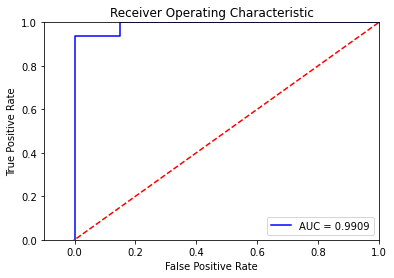

In [27]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % roc_auc_score(test, pred))
plt.legend(loc = 'lower right')
plt.plot([-0.1, 1], [-0.1, 1],'r--')
plt.xlim([-0.1, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**For 1 & 7:**

In [28]:
#Train-test split for 1 & 7
x_train_1_7, x_test_1_7, y_train_1_7, y_test_1_7 = train_test_split(data_1_7_filter, data_1_7_labels, test_size=0.25, random_state=40)

In [29]:
x_train_1_7 = np.array(x_train_1_7)
x_test_1_7 = np.array(x_test_1_7)
y_train_1_7 = np.array(y_train_1_7)
y_test_1_7 = np.array(y_test_1_7)

In [30]:
logistic_regression = LogisticRegressionCV(cv=5, random_state=20)
lr_fit_1_7 = logistic_regression.fit(x_train_1_7, y_train_1_7)
predict_1_7 = lr_fit_1_7.predict(x_test_1_7)
predict_1_7

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([1, 7, 7, 1, 1, 7, 1, 1, 7, 1, 7, 1, 1, 1, 1, 7, 1, 7, 1, 1, 1, 7,
       7, 1, 7, 7, 1, 1, 7, 7, 1, 7, 1, 7, 7, 1, 1, 7, 1, 7, 7, 1, 7, 7,
       7, 7, 7, 1, 1, 7, 7, 7, 7, 7, 1, 7, 1], dtype=uint8)

In [31]:
y_test_1_7

array([[1],
       [7],
       [7],
       [1],
       [1],
       [7],
       [1],
       [1],
       [7],
       [1],
       [7],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [7],
       [7],
       [1],
       [1],
       [7],
       [7],
       [1],
       [7],
       [7],
       [1],
       [1],
       [7],
       [7],
       [1],
       [7],
       [1],
       [7],
       [7],
       [1],
       [1],
       [7],
       [1],
       [7],
       [7],
       [1],
       [7],
       [7],
       [7],
       [7],
       [7],
       [1],
       [1],
       [7],
       [7],
       [7],
       [7],
       [7],
       [1],
       [7],
       [1]], dtype=uint8)

In [32]:
print("accuracy for 1 & 7:",accuracy_score(y_test_1_7, predict_1_7))
print("recall for 1 & 7:", recall_score(y_test_1_7, predict_1_7))
print("precision for 1 & 7:",precision_score(y_test_1_7, predict_1_7))

accuracy for 1 & 7: 0.9649122807017544
recall for 1 & 7: 0.9629629629629629
precision for 1 & 7: 0.9629629629629629


In [33]:
test_1_7 = y_test_1_7
pred_1_7 = logistic_regression.predict_proba(x_test_1_7)[:, 1]
print('roc_auc_score for Logistic regression of 1 & 7 is : ', roc_auc_score(y_test_1_7, pred_1_7))

# assign fpr, tpr
fpr_1_7, tpr_1_7, threshold_1_7 = roc_curve(test_1_7, pred_1_7, pos_label=7)

auc_df1 = pd.DataFrame([fpr_1_7,tpr_1_7]).T
auc_df1.columns = ["fpr", "tpr"]

roc_auc_score for Logistic regression of 1 & 7 is :  0.9925925925925927


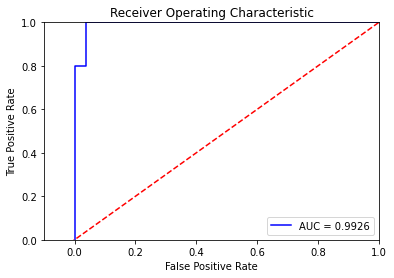

In [34]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_1_7, tpr_1_7, 'b', label = 'AUC = %0.4f' % roc_auc_score(y_test_1_7, pred_1_7))
plt.legend(loc = 'lower right')
plt.plot([-0.1, 1], [-0.1, 1],'r--')
plt.xlim([-0.1, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



**2.3) Explain any differences in performance between the four datasets (zero and one, one and seven, zero and one subset, one and seven subset)**

For the four datasets above, in case of zero and one, the accuracy, precision and recall and roc_auc_score all came 1.0 meaning the model was able to predict at 100% accuracy. In case of one and seven, the accuracy is 0.98, precision is 0.96 and recall is 1.0 and roc_auc_score is 0.998 and based on the accuracy and AUC score this model also outperformed in predicting one and seven giving an accuracy of 98%.

Now in case of zero and one subset, my accuracy is 0.94, recall 1.0, precision 0.91 and roc_auc_score is 0.990 meaning this subset model also performed pretty well with 94% accuracy and 0.990 AUC. For one and seven, the accuracy is 0.96, precision is 0.96 and recall is 0.96 and roc_auc_score is 0.992 and based on the accuracy and AUC score this model also performed well in predicting one and seven giving an accuracy of 96% and 0.992 AUC.

Now comparing the results for the one with the whole dataset and the one with the subset data, there wasn't too much difference in performance between them but if you notice closely, for zero and one & zero and one subset the AUC differed by 0.01 and for one and seven & one and seven subset the AUC differed by 0.006 which is not too much. This could be because we reduced the number of features in the later one, so it performed slightly less compared to the former model with the whole dataset but allover both of them performed well.